                                 0              1              2   \
Investment           -859747.669405       0.000000       0.000000   
Sales                      0.000000  591300.000000  609039.000000   
Depreciation               0.000000 -644810.752054 -644810.752054   
Loan principal             0.000000 -107413.792906 -111710.344622   
Loan interest              0.000000  -51584.860164  -47288.308448   
Salaries                   0.000000 -360000.000000 -367200.000000   
Water                      0.000000 -101703.600000 -104754.708000   
EBT                  -859747.669405 -566799.212218 -555014.768502   
Taxes                      0.000000       0.000000       0.000000   
EAT                  -859747.669405 -566799.212218 -555014.768502   
Cash Flow            -859747.669405  -29402.253070  -21914.361070   
Cumulative Cash Flow -859747.669405 -889149.922475 -911064.283545   

                                 3              4              5   \
Investment                 0.0000

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 12 x 20)
  '(shape is %d x %d)' % inp.shape[::-1])


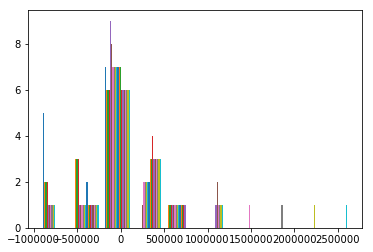

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy_financial import pmt, ipmt, ppmt, npv, irr


data_factors = np.array([[0.3, 0.5, 0.6],
                         [0.8, 0.6, 0.2],
                         [0.3, 0.3, 0.2],
                         [0.2, 0.2, 0.15],
                         [0.3, 0.3, 0.2],
                         [0.2, 0.2, 0.1],
                         [0.1, 0.1, 0.05],
                         [0.3, 0.4, 0.4],
                         [0.35, 0.25, 0.2],
                         [0.1, 0.1, 0.1]])

Capital_factors = pd.DataFrame(data_factors,
                               index=["fer", "fp", "fi", "fel", "fc", "fs", "fl", "OS", "D&E", "X"], 
                               columns=["Fluids", "Fluids-Solids", "Solids"])


capacity_factor = 0.9


#Estimation Cash Flow Years
years = 20



class Contactica:
    



    def boiler(self, Q, p, fm=1, installed=True):
        
        """Return boiler cost. Inputs:
        Vapor production (kg/h): 5000 < Q < 800000
        Pressure (bar): 			   10 < p < 70
        fm = material factor"""

        assert type(installed) == bool

        if Q < 5000 or Q > 800000:
            print(f"    - WARNING: boiler vapor production out of method bounds, 5000 < Q < 800000. Results may not be accurate.")

        if p < 10 or p > 70:
            print(f"    - WARNING: boiler pressure out of method bounds, 10 < p < 70. Results may not be accurate.")

        if Q < 20000:
            Cb = 106000 + 8.7*Q
        elif Q < 200000:
            if p < 15:
                Cb = 110000 + 4.5*Q**0.9
            elif p < 40:
                Cb = 106000 + 8.7*Q
            else:
                Cb = 110000 + 4.5*Q**0.9
            
        if installed:
            Cb *= ((1+Capital_factors.loc["fp"]["Fluids"])*fm+(Capital_factors.loc["fer"]["Fluids"] + Capital_factors.loc["fel"]["Fluids"]
                                                        + Capital_factors.loc["fi"]["Fluids"] + Capital_factors.loc["fc"]["Fluids"]
                                                        + Capital_factors.loc["fs"]["Fluids"] + Capital_factors.loc["fl"]["Fluids"]))

        return Cb


    def pump(self, Q, fm=1, installed=True):
        
        """Return centrifuge pump cost for a caudal between 0.2 and 126 L/s. Inputs:
        phase = 'Fluids', 'Fluids - Solids' or 'Solids'
        fm = material factor"""

        assert type(installed) == bool

        if Q < 0.2 or Q > 126:
            print(f"    - WARNING: pump caudal out of method bounds, 0.2 < Q (L/s) < 126. Results may not be accurate.")
    
        Cp = 6900 + 206*Q**0.9

        if installed:
            Cp *= ((1+Capital_factors.loc["fp"]["Fluids"])*fm+(Capital_factors.loc["fer"]["Fluids"] + Capital_factors.loc["fel"]["Fluids"]
                                                         + Capital_factors.loc["fi"]["Fluids"] + Capital_factors.loc["fc"]["Fluids"]
                                                         + Capital_factors.loc["fs"]["Fluids"] + Capital_factors.loc["fl"]["Fluids"]))

        return Cp
    
    def steam_turbine(self, kW, fm=1, installed=True):
        """Return steam turbine cost for a power between 100 and 20000 kW. Inputs:
        fm = material factor"""

        assert type(installed) == bool
    
        if kW < 100 or kW > 20000:
            print(f"    - WARNING: steam turbine power out of method bounds, 100 < kW < 20000. Results may not be accurate.")
    
        Cst = -12000 + 1630*kW**0.75

        if installed:
            Cst *= ((1+Capital_factors.loc["fp"]["Fluids"])*fm +(Capital_factors.loc["fer"]["Fluids"] + Capital_factors.loc["fel"]["Fluids"]
                                                             + Capital_factors.loc["fi"]["Fluids"] + Capital_factors.loc["fc"]["Fluids"]
                                                             + Capital_factors.loc["fs"]["Fluids"] + Capital_factors.loc["fl"]["Fluids"]))

        return Cst

    
    def loan(self, quantity, interest, years):
        """Compute annual payment of a loan. Inputs:
        quantity [monetary units] == investment which will be funded
        interest [as fraction of unity] == annual interest
        years == number of yeras to return the loan."""

        assert quantity > 0
        assert interest >= 0 and interest <= 1
        assert years > 1

        loan_payment   = pmt(interest, years, quantity)
        loan_interest  = ipmt(interest, np.arange(years) + 1, years, quantity)
        loan_principal = ppmt(interest, np.arange(years) + 1, years, quantity)
        
        return loan_payment , loan_interest , loan_principal

    
    def loanp(self, quantity, interest, years):
        """Compute annual payment of a loan. Inputs:
        quantity [monetary units] == investment which will be funded
        interest [as fraction of unity] == annual interest
        years == number of yeras to return the loan."""

        assert quantity > 0
        assert interest >= 0 and interest <= 1
        assert years > 1

        loan_payment   = pmt(interest, years, quantity)
        loan_interest  = ipmt(interest, np.arange(years) + 1, years, quantity)
        loan_principal = ppmt(interest, np.arange(years) + 1, years, quantity)
        
        return loan_payment


    def loanint(self, quantity, interest, years):
        """Compute annual payment of a loan. Inputs:
        quantity [monetary units] == investment which will be funded
        interest [as fraction of unity] == annual interest
        years == number of yeras to return the loan."""

        assert quantity > 0
        assert interest >= 0 and interest <= 1
        assert years > 1

        loan_payment   = pmt(interest, years, quantity)
        loan_interest  = ipmt(interest, np.arange(years) + 1, years, quantity)
        loan_principal = ppmt(interest, np.arange(years) + 1, years, quantity)
        
        return loan_interest



    def loanprp(self, quantity, interest, years):
        """Compute annual payment of a loan. Inputs:
        quantity [monetary units] == investment which will be funded
        interest [as fraction of unity] == annual interest
        years == number of yeras to return the loan."""

        assert quantity > 0
        assert interest >= 0 and interest <= 1
        assert years > 1

        loan_payment   = pmt(interest, years, quantity)
        loan_interest  = ipmt(interest, np.arange(years) + 1, years, quantity)
        loan_principal = ppmt(interest, np.arange(years) + 1, years, quantity)
        
        return loan_principal


    
    




    
    
    
    
    
    
    
    
    
    
    def depreciation(self, annual_percent, capex, residual_value=0):
        """Compute annual depreciation of investment. Inputs:
        annual_percent [as fraction of unity] == annual percent of depreciation.
        capex [monetary units] == capital expenditure
        residual_value[monetary units] == plant value at the end of its life."""

        assert annual_percent >= 0 and annual_percent <= 1

        annual_depreciation = []
        prev = 1

        while True:
            if prev < annual_percent:
                annual_depreciation.append(prev)
                break
            annual_depreciation.append(annual_percent)
            prev = prev - annual_percent

        depreciation_array = -1 * np.array(annual_depreciation) * (capex - residual_value)

        return depreciation_array


    def cost_estimation_cond(self, costKnown, MagniEst, MagniKnown, WillFactor):
        
        Cestim_cond = costKnown * (MagniEst / MagniKnown)**WillFactor
        
        return Cestim_cond
    
    
    
    def cotex(self, Cb, Cp, Cst, Cnd):
        
        Cotex = Cb + Cp + Cst + Cnd
        
        return Cotex   
    
    
    
    
    def water(self, MoneyTon):
        
        Water = MoneyTon * 10 * 8760 * capacity_factor
        
        return Water       
    
    
    
    def salaries(self,NumEmployee, Shift, GrossSalary):
        
        Sal = NumEmployee * Shift * GrossSalary
        
        return Sal       
    
    
    
    
    
    def sales(self, kW, ElectSale):
        
        sale = kW * ElectSale * 8760 * capacity_factor  
        
        return sale   

    
    
    def Table(self, years, CTX, Dep, principal, interest, SL, Wtr, SLRY):
        
        
        investment    = np.array([-CTX*0.4] + [0 for i in range(years-1)])
        depreciation  = np.hstack(([0], Dep, [0 for i in range(years-1-len(Dep))]))
        loan_prin     = np.hstack(([0], principal, [0 for i in range(years-1-len(principal))]))
        loan_int      = np.hstack(([0], interest, [0 for i in range(years-1-len(interest))]))

        sales_array    = np.zeros(years)
        water_array    = np.zeros(years)
        salaries_array = np.zeros(years)   

        for i in range(years):
            if i == 0:
                sales_array[i]    = 0
                water_array[i]    = 0
                salaries_array[i] = 0
            elif i == 1:
                sales_array[i]    = SL
                water_array[i]    = -1*Wtr
                salaries_array[i] = -1*SLRY
            else:
                sales_array[i]    = sales_array[i-1]*1.03
                water_array[i]    = water_array[i-1]*1.03
                salaries_array[i] = salaries_array[i-1]*1.02

        ebt   = np.vstack((investment, depreciation, loan_int, sales_array, water_array, salaries_array)).sum(axis=0)
        taxes = ebt * -0.3
        for i in range(len(taxes)):
            if taxes[i] > 0:
                taxes[i] = 0
        eat = ebt - taxes
        cash_flow = eat - depreciation + loan_prin
        cumulative_cash_flow = np.cumsum(cash_flow)

        data = np.vstack((investment, sales_array, depreciation, loan_prin, loan_int, salaries_array, water_array, ebt, 
                      taxes, eat, cash_flow, cumulative_cash_flow))
        df   = pd.DataFrame(data,
                        index=['Investment', 'Sales', 'Depreciation', 'Loan principal', 'Loan interest', 'Salaries',
                               'Water', 'EBT', 'Taxes', 'EAT', 'Cash Flow', 'Cumulative Cash Flow'],
                        columns=[i for i in range(years)])  
        
        
        return df


    
  
    
    
    
    
    
    
    
    
boiler3=Contactica()


#Parameter Environment
Wtr = boiler3.water(1.29)
SLRY = boiler3.salaries(4, 3, 30000)
SL = boiler3.sales(1500, 0.05)




#Techical Documentation
B = boiler3.boiler(10000,70)
P = boiler3.pump(2.85)
ST = boiler3.steam_turbine(1500)


#Money Factor Environment
Cond = boiler3.cost_estimation_cond(400000, 10000, 15000, 0.8)
CTX = boiler3.cotex(B, P, ST, Cond)
Dep = boiler3.depreciation(0.3, CTX)

L = boiler3.loan(0.6*CTX, 0.04, 10)
Lp= boiler3.loanp(0.6*CTX, 0.04, 10)
Lint= boiler3.loanint(0.6*CTX, 0.04, 10)
Lprp= boiler3.loanprp(0.6*CTX, 0.04, 10)






#print(B, P, ST, L)
#print(Dep)
#Calcular Capex
#print(CTX)
#print(L)


TABLE = boiler3.Table(20, CTX, Dep, Lprp, Lint, SL, Wtr, SLRY)
print(TABLE)


#draw the Table and details
plt.hist(TABLE, label = 'Table of Project')
plt.show()


TABLE.to_excel(r'C:\Users\josemariafernandezmora\Desktop\export_dataframe.xlsx', index = False, header=True)

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 12 x 20)
  '(shape is %d x %d)' % inp.shape[::-1])


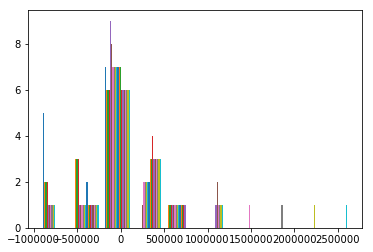

In [18]:
plt.hist(TABLE, label = 'Table of Project')
plt.show()

In [22]:
TABLE.to_excel(r'C:\Users\Ron\josemariafernandezmora\export_dataframe.xlsx', index = False, header=True)

In [178]:
Dep

array([-644810.75205379, -644810.75205379, -644810.75205379,
       -214936.91735126])

In [166]:
principal

[-107413.52585068,
 -111710.0668847,
 -116178.46956009,
 -120825.60834249,
 -125658.63267619,
 -130684.97798324,
 -135912.37710257,
 -141348.87218667,
 -147002.82707414,
 -152882.94015711]

In [167]:
interest

[-51584.73191272,
 -47288.19087869,
 -42819.7882033,
 -38172.6494209,
 -33339.6250872,
 -28313.27978015,
 -23085.88066082,
 -17649.38557672,
 -11995.43068925,
 -6115.31760628]

In [162]:
Dep

array([-644810.75205379, -644810.75205379, -644810.75205379,
       -214936.91735126])

NameError: name 'df' is not defined

In [163]:
data_factors

array([[0.3 , 0.5 , 0.6 ],
       [0.8 , 0.6 , 0.2 ],
       [0.3 , 0.3 , 0.2 ],
       [0.2 , 0.2 , 0.15],
       [0.3 , 0.3 , 0.2 ],
       [0.2 , 0.2 , 0.1 ],
       [0.1 , 0.1 , 0.05],
       [0.3 , 0.4 , 0.4 ],
       [0.35, 0.25, 0.2 ],
       [0.1 , 0.1 , 0.1 ]])

In [131]:
CTX

2149369.1735126185

In [132]:
Cond

289192.4723193863